<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Tarea 1 - Código Base</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2024-1</h2>
</center>

# Consultas

* Enviar a: **tareas.inf285@gmail.com**
* Se recibirán consultas en **tres** bloques. i) El primer bloque será desde las 12:15 hrs. hasta las 17:00 hrs. del día jueves, donde todas las preguntas recibidas dentro de este bloque se responderán con seguridad a partir de las 17:01 hrs. del día jueves. (ii) El segundo bloque de consultas será desde las 17:01 hrs. del día jueves hasta las 08:15 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 08:16 hrs. del día viernes. (iii) El tercer, y último bloque, de consultas será desde las 08:16 hrs. hasta las 14:30 hrs. del día viernes, donde las preguntas recibidas dentro de este bloque horario se responderán con seguridad a partir de las 14:31 hrs. del día viernes.

# Librerías (no utilizar liberías adicionales)

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Contexto

Consideremos la siguiente función:

$$
f(x) = 2\,\exp(x)\,\sin(2\,x)^2
$$

A continuación se muestra una gráfica de la función:

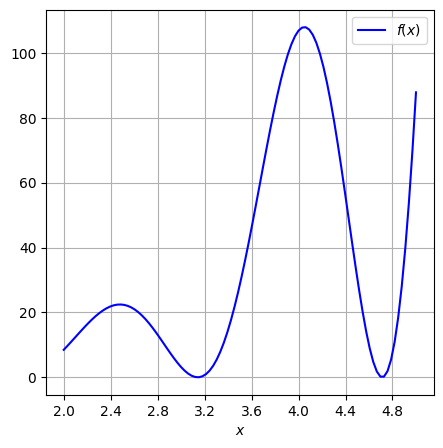

In [37]:
f = lambda x: 2.*np.exp(x)*np.power(np.sin(2.*x),2)

plt.figure(figsize=(5,5))
x = np.linspace(2.,5.,100)
y = f(x)
plt.plot(x,y,'b-', label='$f(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.xticks(np.arange(2.,5.,.4))
plt.legend(loc='best')
plt.show()

Podemos notar que en el intervalo $[2.8,4.8]$ la función tiene dos raíces. Analicemos primero el intervalo $[2.8,3.6]$, en este caso, si aplicamos el método de la Bisección tenemos que $f(2.8)\,f(3.6) > 0$, por lo tanto, el método falla y no inicia una búsqueda de la raíz. Lo mismo sucede en el intervalo $[4.4,4.8]$. Lo podemos verificar, ejecutando el método de la Bisección en los intervalos indicados.

# Funciones Entregadas (No debe modificarlas)

In [38]:
def bisect(f, a, b, tol=1e-12):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   left value of interval.
    b   : (double)   right value of interval.
    tol : (double)   tolerance.

    output:
    xc  : (double)   root approximation of f.
    """
    fa = f(a)
    fb = f(b)
    i = 0
    if np.sign(fa*fb) > 0:
        return None

    while((b-a)/2 > tol):
        c = (a+b)/2
        fc = f(c)
        if fc == 0:
            break
        elif np.sign(fa*fc) < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
        i += 1
    xc = (a + b)/2
    return xc

Ejecutamos el método de la Bisección en el intervalo $[2.8,3.6]$:

In [39]:
bisect(f,2.8,3.6) == None

True

Ejecutamos el método de la Bisección en el intervalo $[4.4,4.8]$:

In [40]:
bisect(f,4.4,4.8) == None

True

# Búsqueda de puntos críticos!

Una solución para el problema anterior, es abordarlo como una búsqueda de puntos críticos, es decir, encontrar los puntos donde la derivada de la función es igual a $0$. Podemos notar, que en el intervalo $[2.8,4.8]$ existen dos puntos críticos, los cuales son a su vez las raíces de $f(x)$!

# Pregunta 1.

Utilice el método de la Bisección para encontrar un punto crítico de una función $f(x)$ en un intervalo $[a,b]$. Para abordar este problema utilice la siguiente aproximación para la derivada de $f(x)$ en el punto $x$ denominada *diferencia finita central*:

$$
f'(x) \approx \dfrac{f(x + h) - f(x - h)}{2h}
$$

donde $h$ es el paso de la aproximación.

1.1 (10 puntos) Construya la aproximación de la derivada para una función $f(x)$.

In [41]:
def fp(f,x,h):
    """
    input:
    f   : (callable) function to evaluate.
    x   : (double)   point where the derivative is approximated.
    h   : (double)   approximation step.

    output:
    yp  : (double)   derivative approximation of f at x.
    """
    #acá va su codigo
    #--------------------------------
    yp = (f(x+h) - f(x-h))/(2*h)
    #--------------------------------
    return yp

1.2 (25 puntos) Construya un algoritmo que utilice el método de la Bisección, y permita encontrar un punto crítico $x_c$ para una función $f(x)$ en el intervalo $[a,b]$ con un paso de aproximación $h$. En caso de que el punto no sea encontrado, debe retornar **None**.

*Hint: your implementation must call the bisection method provided.*

In [42]:
def critical_point(f, a, b, h, tol_cp=1e-12):
    """
    input:
    f      : (callable) function to evaluate.
    a      : (double)   left value of interval.
    b      : (double)   right value of interval.
    h      : (double)   approximation step.
    tol_cp : (double)   tolerance for the critical point approximation.

    output:
    xc  : (double)   critical point approximation of f in the interval [a,b].
    """
    #acá va su codigo
    #--------------------------------
    f_der = lambda x: (f(x+h) - f(x-h))/(2*h)
    xc = bisect(f_der,a,b,tol_cp)
    if xc == None:
      return None
    #--------------------------------
    return xc

1.3 (5 puntos) Determine la raíz $r_1$ para la función $f(x) = 2\,\exp(x)\,\sin(2\,x)^2$ en el intervalo $[2.8,3.6]$ con $h = 10^{-6}$.

In [43]:
#acá va su codigo
#--------------------------------
a,b = 2.8,3.6
critical_point(f,a,b,1e-6)

#--------------------------------

3.1415926535897603

1.4 (5 puntos) Seleccione un valor para $h$ en función de la siguiente gráfica, que muestra la relación entre $h$ y el error relativo de la raíz $r_1$. Justifique su respuesta.

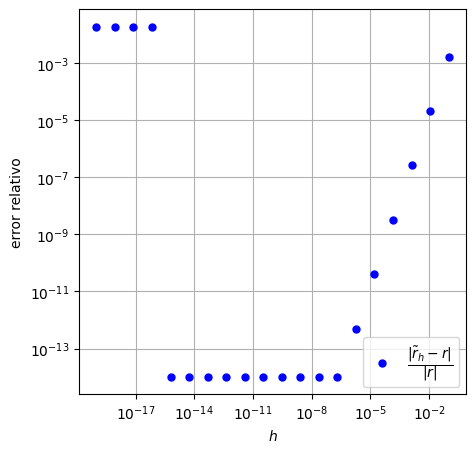

In [44]:
h = np.logspace(-19,-1,20)

cp = lambda h: critical_point(f,a,b,h)
cp_vec = np.vectorize(cp)
cp_arr = cp_vec(h)
error_rel = np.abs(cp_arr - np.pi)/np.pi

plt.figure(figsize=(5,5))
plt.loglog(h,error_rel,'b.', label=r'$\dfrac{|\tilde{r}_h - r|}{|r|}$', markersize=10)
plt.grid(True)
plt.xlabel(r'$h$')
plt.ylabel('error relativo')
plt.legend(loc='best')
plt.show()

Escriba su justificación de la elección de $h$:

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**
En el gráfico con los valores de $h$ que comienzan desde $10^{-19}$ se observa que cuando $h$ pertence al intervalo \[$10^{-15},10^{-6}$\] se puede apreciarque el valor del error es muy cercano a 0, por lo que el error se hace mínimo y en ese rango de valores de $h$ la raiz aproximada es más cercana  ala raiz real de la función.

**---------------------------------------------------------------------------------------------------------------------------**

# Pregunta 2.

Sea la función $f_1(x) = \exp(x)\,((x - 2.5)^2 - 1.5)$. Podemos observar que la función en el intervalo $[0,4]$ tiene dos raíces $r_1$ y $r_2$ con multiplicidad $1$.

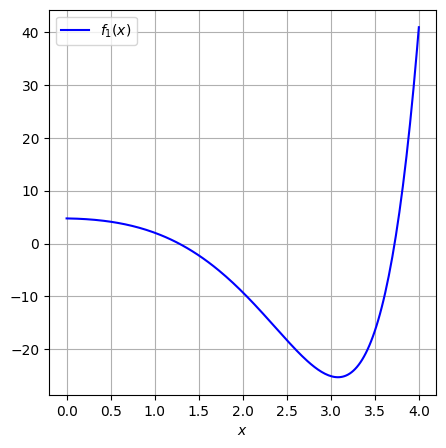

In [45]:
f1 = lambda x: np.exp(x)*(np.power(x - 2.5,2) - 1.5)

plt.figure(figsize=(5,5))
x = np.linspace(0.,4.,200)
y = f1(x)
plt.plot(x,y,'b-', label='$f_1(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.show()

2.1 (30 puntos) Considere que ahora usted dispone de una función $f(x)$ en un intervalo $[a,b]$, tal que existen dos raíces $r_1$ y $r_2$ con multiplicidad $1$ y solamente un punto crítico $x_c$ en $[a,b]$ tal que $f'(x_c) = 0$. Construya un algoritmo que permita encontrar ambas raíces basado en el método de la Bisección. En caso de que no sea posible encontrar las raíces, debe retornar **None** para $r_1$ y $r_2$.

*Hint: it would be very useful to use the algorithm implemented before, i.e. critical_point, within your code.*

In [46]:
def both_roots(f,a,b,h,tol=1e-12):
    """
    input:
    f   : (callable) function to evaluate.
    a   : (double)   left value of interval.
    b   : (double)   right value of interval.
    h   : (double)   approximation step.
    tol : (double)   tolerance.

    output:
    r1  : (double)   approximation of root r1.
    r2  : (double)   approximation of root r2.
    """
    #acá va su codigo
    #--------------------------------
    fc = critical_point(f,a,b,h,tol)
    r1 = bisect(f,a,fc,tol)
    r2 = bisect(f,fc,b,tol)
    if r1 == None:
      return None, None
    if r2 == None:
      return None, None
    #--------------------------------
    return r1,r2

2.2 (5 puntos) Determine las raíces $r_1$ y $r_2$ en el intervalo $[0,4]$ para $f_1(x)$.

In [47]:
#acá va su codigo
#--------------------------------
both_roots(f1,0.,4.,1e-5)
#--------------------------------

(1.2752551286085072, 3.7247448713921187)

2.3 Sea la función $f_2(x) = 0.5\,\exp(x)\,\sin(3x)^2 - 10$. Ejecute el algoritmo *both_roots* para encontrar las raíces $r_1$ y $r_2$ en el intervalo $[0,4]$, es decir, ejecute el siguiente código:

In [48]:
f2 = lambda x: .5*np.exp(x)*np.power(np.sin(3.*x),2) - 10.
h = 1e-7
both_roots(f2,0.,4.,h)

(None, None)

2.4 (10 puntos) ¿Ha encontrado las raíces $r_1$ y $r_2$? Si no es así, ¿Cómo usted debería ejecutar el algoritmo *both_roots* para encontrar ambas raíces?

*Hint 1: it would helpful to observe $f_2(x)$ on the interval of interest.*

*Hint 2: Do you observe any issues with the number of critical points available?*

**---------------------------------------------------------------------------------------------------------------------------**

**Respuesta:**
Para que funcione el algoritmo $both\_roots$ para la función $f2$, se debe conocer mejor su comportamiento en el intervalo de interés, con ayuda de un gráfico se puede observar y que esta presenta varios puntos críticos por lo que la función no encuentra el punto crítico cercano al que sus raíces se encuentran y por lo tanto la función retorna $None$, entoncea cuando $x$ es cercano a $3.5$ y $4$ se puede observar que está cercano a las raíces deseadas, por lo que cambiando el intervalo en el que se ejecuta la función $boot\_roots$ se puede llegar estos valores. En este caso el intervalo $[3.4,4]$ **---------------------------------------------------------------------------------------------------------------------------**

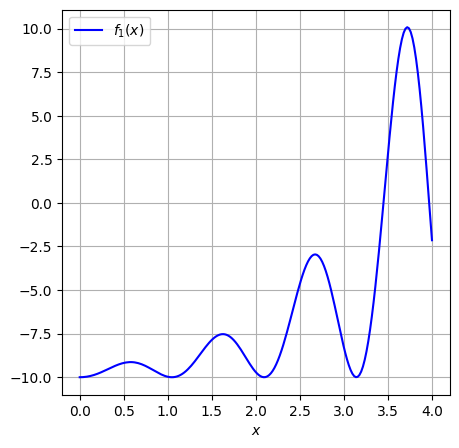

(3.4491207099030765, 3.96799437263617)

In [49]:
#acá va su codigo
#--------------------------------
plt.figure(figsize=(5,5))
x = np.linspace(0.,4.,200)
y = f2(x)
plt.plot(x,y,'b-', label='$f_1(x)$', markersize=10)
plt.grid(True)
plt.xlabel(r'$x$')
plt.legend(loc='best')
plt.show()
both_roots(f2,3.4,4.,h)
#--------------------------------